In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout




In [3]:
data = pd.read_csv('C:/Users/vinay/Desktop/IndianBankNifty (2).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
1,2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2,2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
3,2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
4,2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000


In [4]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data -length_train
print('length data :',length_data )
print('length train :', length_train)
print('length validation :', length_validation)

length data : 1257
length train : 880
length validation : 377


In [5]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2018-10-01,163.029999
1,2018-10-02,161.580002
2,2018-10-03,160.000000
3,2018-10-04,161.460007
4,2018-10-05,159.210007
...,...,...
875,2022-03-23,213.330002
876,2022-03-24,215.000000
877,2022-03-25,220.509995
878,2022-03-28,222.130005


In [6]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
880,2022-03-30,228.910004
881,2022-03-31,228.449997
882,2022-04-01,224.550003
883,2022-04-04,225.979996
884,2022-04-05,234.080002
...,...,...
1252,2023-09-22,299.299988
1253,2023-09-25,295.640015
1254,2023-09-26,297.660004
1255,2023-09-27,300.450012


In [7]:
dataset_train = train_data.Open.values
dataset_train.shape

(880,)

In [8]:
# reshape
dataset_train = np.reshape(dataset_train,(-1,1))
dataset_train.shape

(880, 1)

In [9]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

Text(0, 0.5, 'open price')

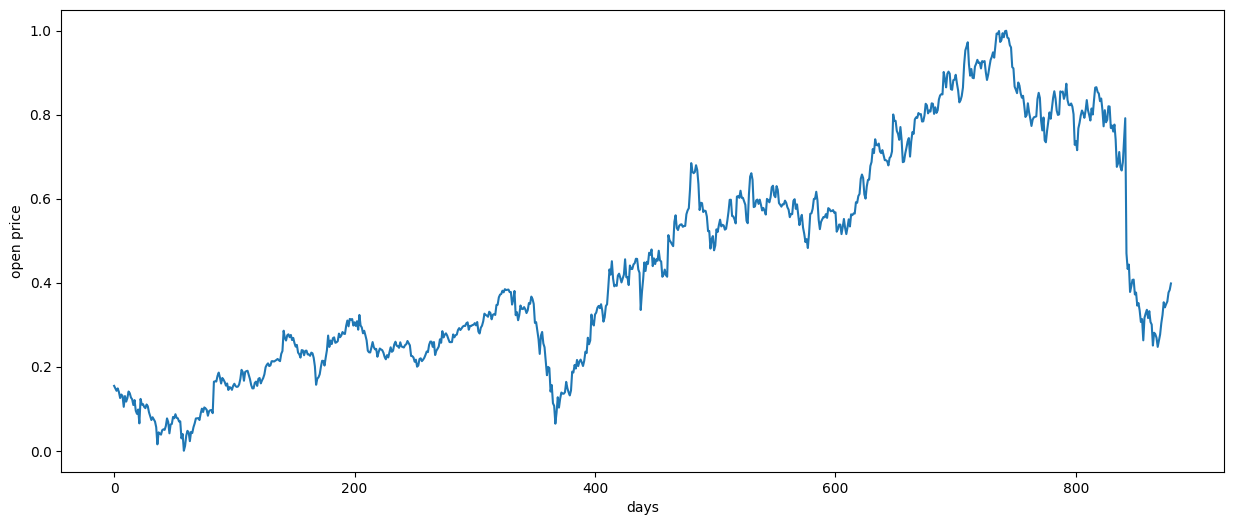

In [10]:
# visualize data
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel('days')
plt.ylabel('open price')

In [11]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    # time_step=50, length_train=880, [51-50, 51]
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape

(830, 50)

In [12]:
#reshape and expand dim
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0] ,1))

print(X_train.shape)
print(y_train.shape)

(830, 50, 1)
(830, 1)


## RNN MODEL ARCHITECTURE ##

In [13]:
reg =Sequential()
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## MODEL COMPILE ##

In [14]:
reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = reg.fit(X_train, y_train, epochs=100, batch_size=32)
print('accuracy','metrics')

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 3.9968e-04 - loss: 0.6974
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0013 - loss: 0.3419 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 3.9968e-04 - loss: 0.2865
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 3.2334e-04 - loss: 0.1983
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0036 - loss: 0.1634
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0035 - loss: 0.1418
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0054 - loss: 0.1423
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0026 - loss: 0.1011
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0017 - loss: 0.0948
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0014 - loss: 0.0707 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0021 - loss: 0.0769
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━

In [15]:

y_pred = reg.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [16]:
y_train = scaler.inverse_transform(y_train)

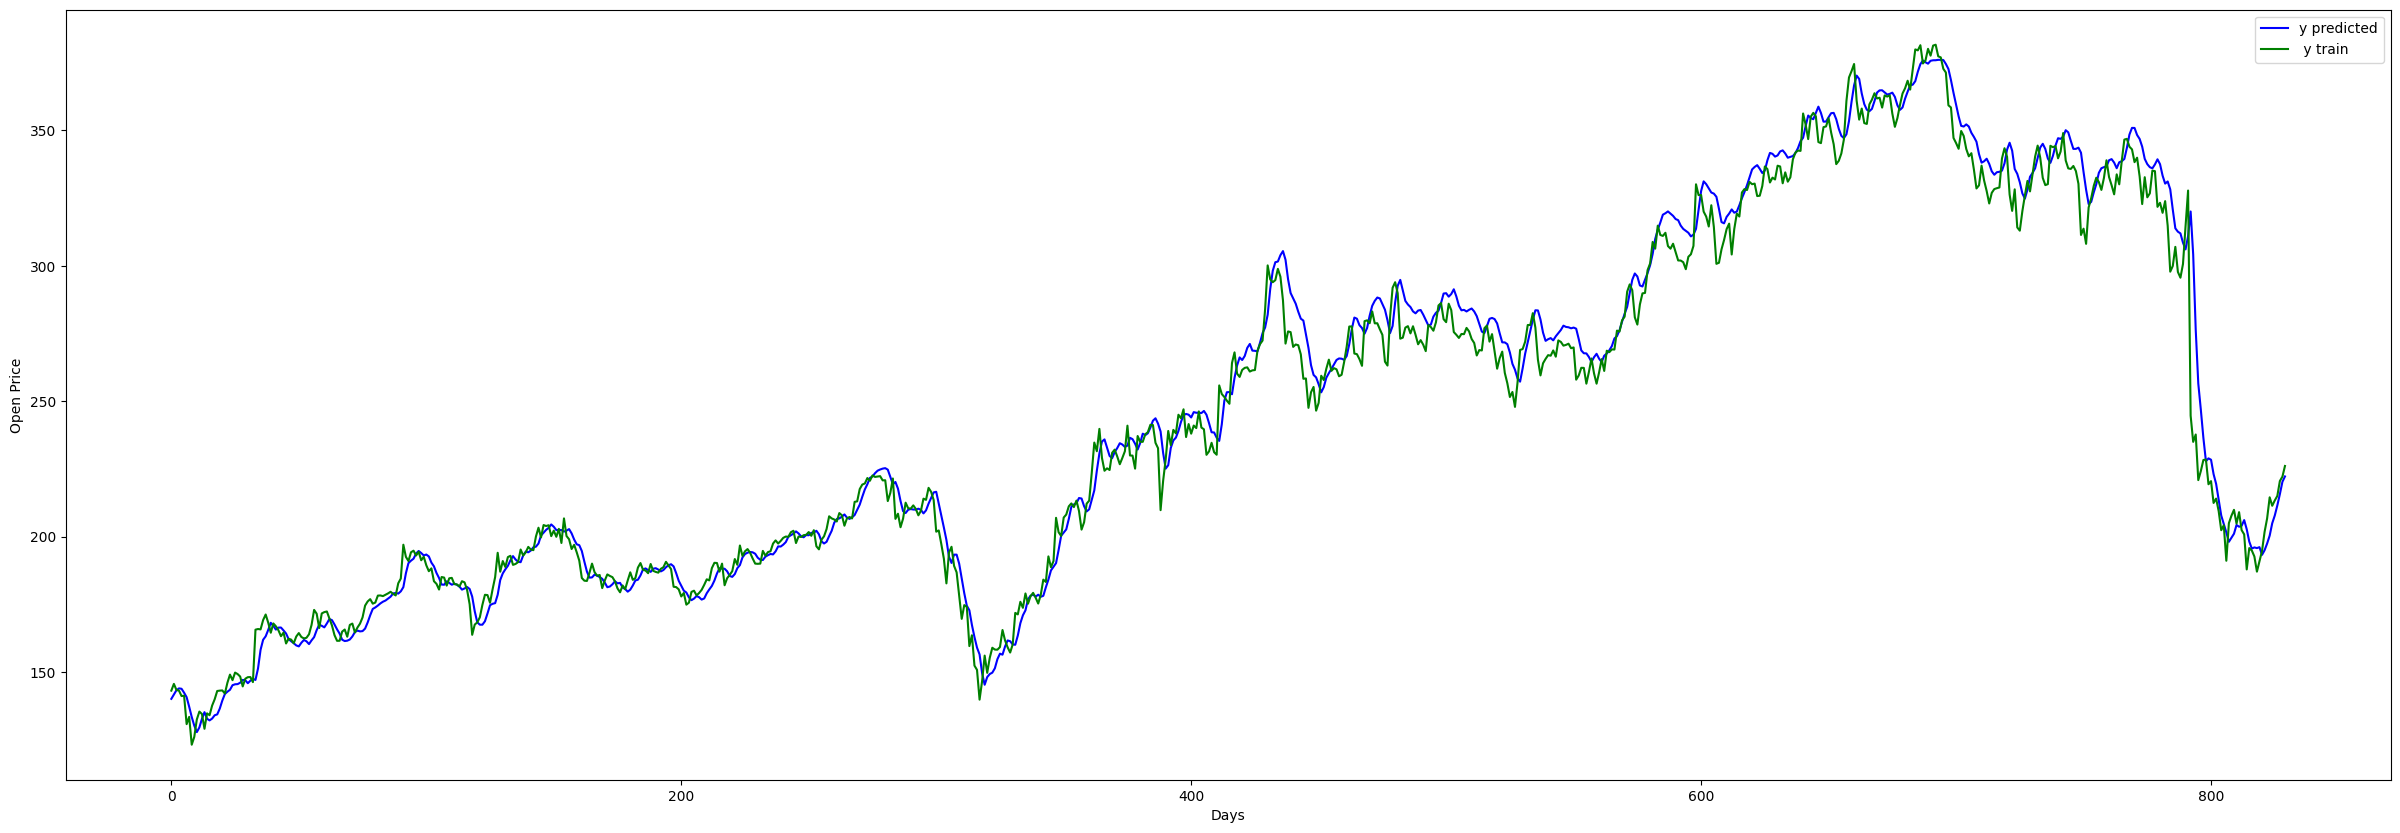

In [17]:
# plot Y_train and Y_pred
plt.figure(figsize=(30, 10))
plt.plot(y_pred, color='b', label='y predicted')
plt.plot(y_train, color = 'g', label = ' y train')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

## Evaluate model on validation data ###

In [18]:

validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1, 1))
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
scaled_dataset_validation.shape

(377, 1)

In [19]:
y_test = []
X_test = []


for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])
    y_test.append(scaled_dataset_validation[i, 0])

In [20]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))
X_test.shape

(327, 50, 1)

In [22]:
y_pred_of_test = reg.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

 4/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


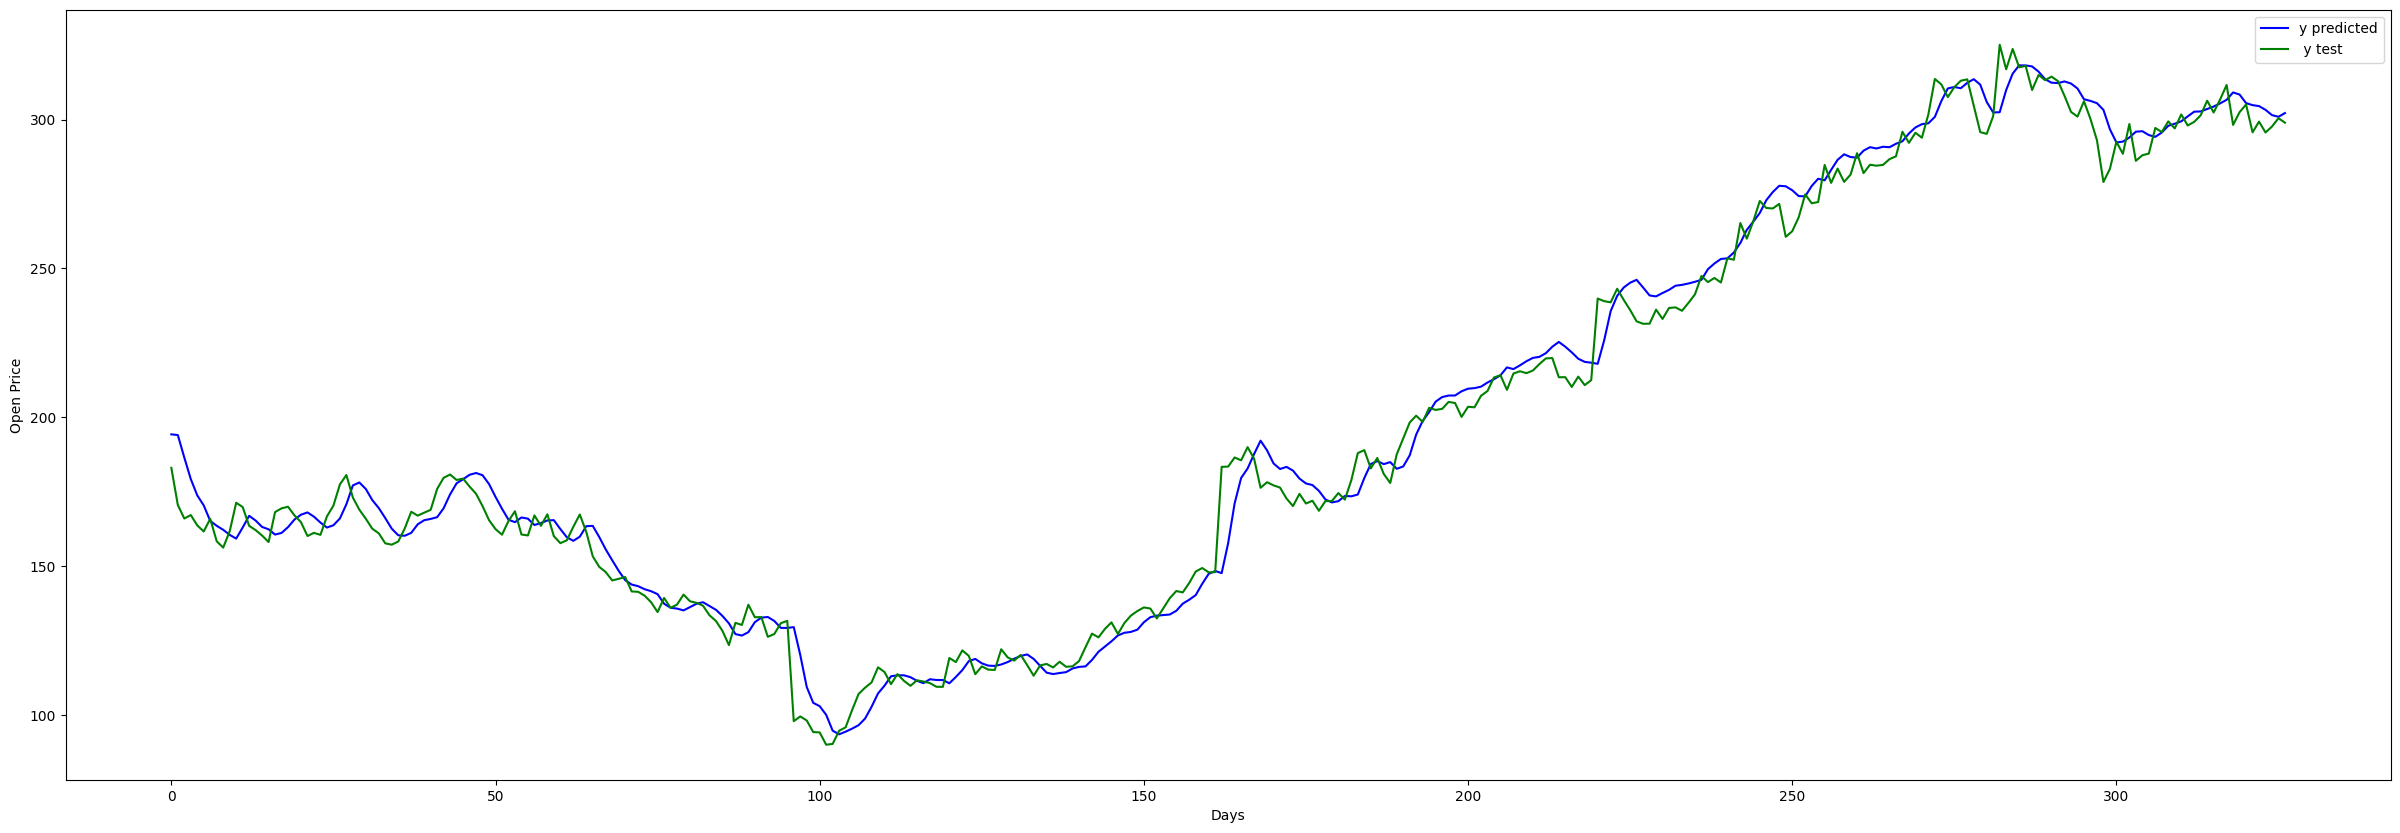

In [23]:
plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, color='b', label='y predicted')
plt.plot( scaler.inverse_transform(y_test), color = 'g', label = ' y test')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

### LSTM MODEL ###

In [24]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
hist= model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 61504.2773
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 52940.5820
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 42955.7617
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 34038.8555
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 23522.1953
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 16338.2988
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 10453.5625
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7160.4556
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5039.1807
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4559.9990
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4410.7842
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4460.9248
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4324.2876
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4246.6050
Epoch 15/100
26/26 ━

In [25]:
X_input=data.iloc[-time_step:].Open.values
X_input = scaler.fit_transform(X_input.reshape(-1, 1))
X_input = np.reshape(X_input, (1, 50, 1))
X_input.shape

(1, 50, 1)

In [26]:
simple_RNN_prediction = scaler.inverse_transform(reg.predict(X_input))
simple_RNN_prediction[0, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


299.14676

In [27]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-09-22,299.299988,305.380005,298.269989,299.079987,299.079987,25351400
1253,2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000
1254,2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
1255,2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800
1256,2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22140800


Epoch 1/100


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0000e+00 - loss: 62788.9492
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 57961.8867
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 54619.9219
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 53159.3867
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0000e+00 - loss: 50996.5664
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0000e+00 - loss: 50913.2383
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 48354.8320
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 48480.1992
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0000e+00 - loss: 45739.9805
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0000e+00 - loss: 44430.9766
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0000

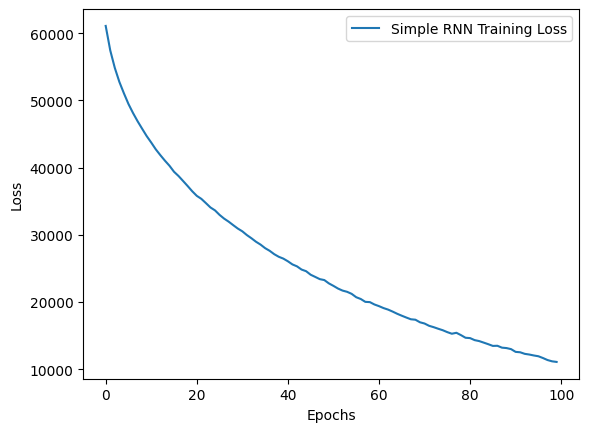

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 122.2893
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 84.7432
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 91.5804
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 79.9798
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 67.6580
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 70.0657
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 66.9502
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 86.8564
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 80.4479
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 75.4308
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 76.7096
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 81.2093
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 95.3941
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 74.7209
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s

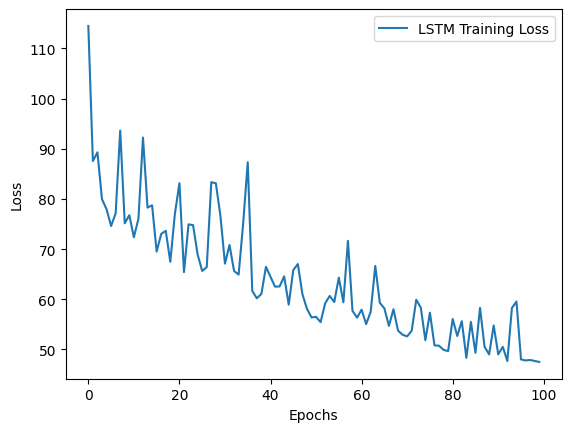

In [28]:
history_rnn = reg.fit(X_train, y_train, epochs=100, batch_size=32)
plt.plot(history_rnn.history['loss'], label='Simple RNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()